# IMporting and downloading necessary libraries.

In [66]:
import matplotlib.pyplot as plt
import nltk

In [67]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Reading text file

In [68]:
with open('text.txt', mode='r') as f:
  text = f.read()
print(text)

I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.

Related to this story
2005 Stanford Commencement coverage
The first story is about connecting the dots.

I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?

It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a wai

#Tokenization + Punctuation removal

In [69]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenized_words = tokenizer.tokenize(text.lower())
print(len(tokenized_words))
print(tokenized_words)

2298
['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', 'i', 'never', 'graduated', 'from', 'college', 'truth', 'be', 'told', 'this', 'is', 'the', 'closest', 'i', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', 'today', 'i', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', 'that', 's', 'it', 'no', 'big', 'deal', 'just', 'three', 'stories', 'related', 'to', 'this', 'story', '2005', 'stanford', 'commencement', 'coverage', 'the', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', 'i', 'dropped', 'out', 'of', 'reed', 'college', 'after', 'the', 'first', '6', 'months', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop', 'in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'i', 'really', 'quit', 'so', 'why', 'did', 'i', 'drop', 'out', 'it', 'started', 'before', 'i', 'was', 'born', 'my', 'biological', 'mother', 'was', 'a', 'you

#Stopwords removal + lemmatization

In [70]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
words_without_stopwords = [word for word in tokenized_words if word not in stop_words]
print(len(words_without_stopwords))
print(words_without_stopwords)

1022
['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'truth', 'told', 'closest', 'ever', 'gotten', 'college', 'graduation', 'today', 'want', 'tell', 'three', 'stories', 'life', 'big', 'deal', 'three', 'stories', 'related', 'story', '2005', 'stanford', 'commencement', 'coverage', 'first', 'story', 'connecting', 'dots', 'dropped', 'reed', 'college', 'first', '6', 'months', 'stayed', 'around', 'drop', 'another', '18', 'months', 'really', 'quit', 'drop', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduates', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parents', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', 'unexpected', 'baby', 'boy', 'want', 'said', 'course', 'biological', 'mother', 'later', 'fo

In [71]:
from nltk.stem import WordNetLemmatizer
lemmatized_words = [WordNetLemmatizer().lemmatize(word) for word in words_without_stopwords]
print(len(lemmatized_words))
print(lemmatized_words)

1022
['honored', 'today', 'commencement', 'one', 'finest', 'university', 'world', 'never', 'graduated', 'college', 'truth', 'told', 'closest', 'ever', 'gotten', 'college', 'graduation', 'today', 'want', 'tell', 'three', 'story', 'life', 'big', 'deal', 'three', 'story', 'related', 'story', '2005', 'stanford', 'commencement', 'coverage', 'first', 'story', 'connecting', 'dot', 'dropped', 'reed', 'college', 'first', '6', 'month', 'stayed', 'around', 'drop', 'another', '18', 'month', 'really', 'quit', 'drop', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduate', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parent', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', 'unexpected', 'baby', 'boy', 'want', 'said', 'course', 'biological', 'mother', 'later', 'found', 'moth

#Add founded emotions in the list

In [72]:
emotion_list = []
with open('emotion_list.txt', mode='r') as f:
  for line in f:
    cleaned_line = line.replace("\n", "").replace(",", "").replace("'", "").strip()
    word, emotion = cleaned_line.split(':')

    if word in lemmatized_words:
      emotion_list.append(emotion)

print(emotion_list)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']


#Count frequency of each emotion

In [73]:
from nltk.probability import FreqDist
w = FreqDist()
for emotion in emotion_list:
  w[emotion] += 1
w

FreqDist({' alone': 1,
          ' attached': 1,
          ' attracted': 1,
          ' entitled': 2,
          ' free': 1,
          ' happy': 5,
          ' hated': 2,
          ' loved': 1})

#Visualize emotions

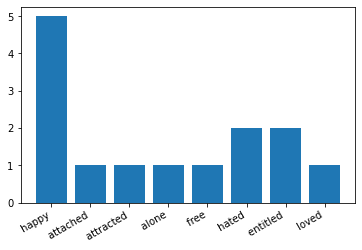

In [74]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()